In [1]:
# first one of the most important point is to import all the basis libraries needed for opencv 
import cv2 
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np 

In [2]:
# it is function which is taken from the stackoverflow 
# which can perform show the image without disturbig quality of image 

def display(im_path):
    
    dpi = 80
    im_data = plt.imread(im_path)

    # for color image , .shape function gives three Attribute
    if(len(im_data.shape)==3):
        height, width, depth = im_data.shape # difference
    else:
        height, width= im_data.shape  #difference

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()



### opening and viewing image using OpenCV 

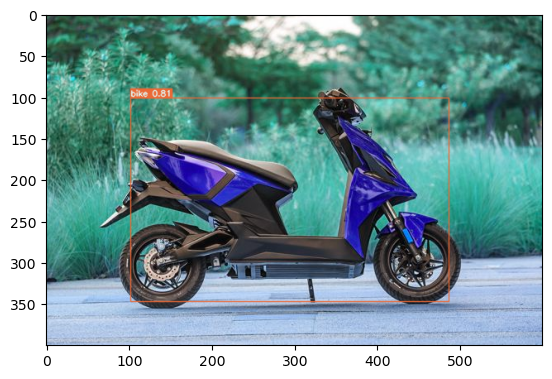

In [4]:
# the cv2 will convert image into a numpy array
image=cv2.imread("bike1-28.png")

# convert np array into image  using pil 
img=Image.fromarray(image)
# img

# showing image from the numpy array as image using plt 
plt.imshow(image)
# we have some problem with show  

In [5]:
# showing image using display function 
# display function will show the image in inline 
# display("data/page_01.jpg")

### Inverting images using OpenCV

In [6]:
# now taking and reading the page1 file 
img=cv2.imread("data/page_01.jpg")
invertedImage=cv2.bitwise_not(img)


# now save the image using imwrite function of the CV2
cv2.imwrite("outputs/invertedPage01.jpg",invertedImage)


True

### binarise the image (normal image ===> Black and White) 
#### image ==> bike & img ==> page01

#### image to grayscale function

In [7]:
# function to convert image to grayScaleImage
def toGrayScale(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

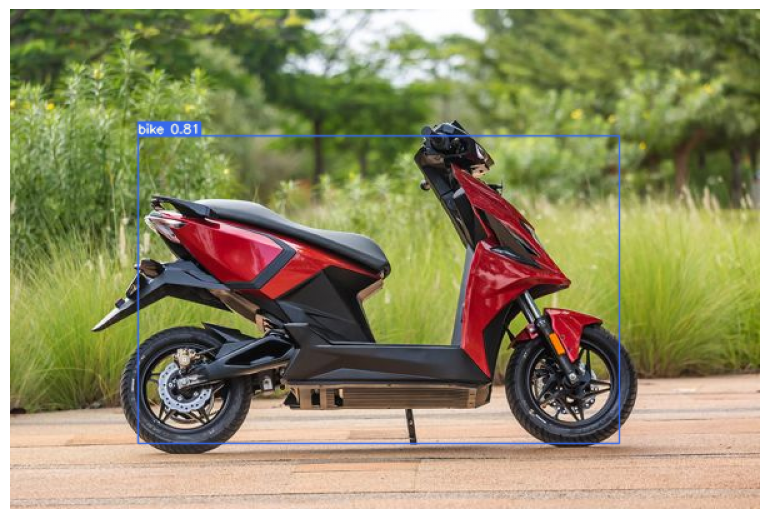

In [8]:
# in order to use convert image into b&w we first need image in grayscale 
display("bike1-28.png")

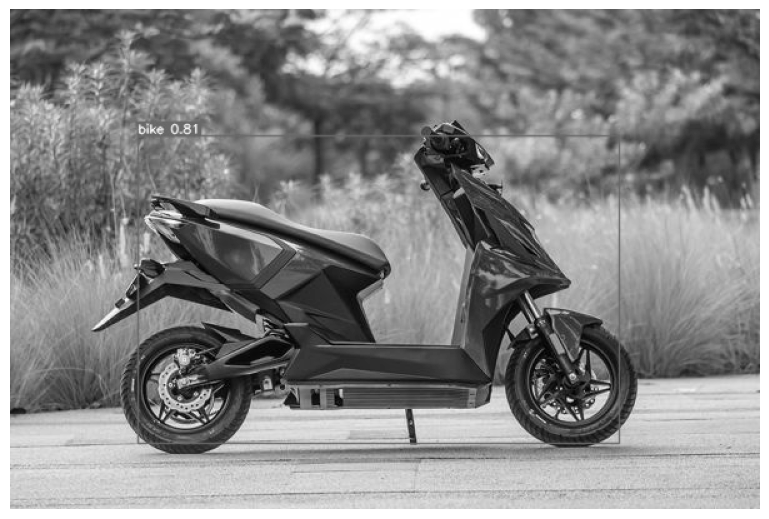

In [9]:
# now also show converted grayScaleImage 
gsBike=toGrayScale(image)
cv2.imwrite("outputs/bikeGrayScaleImage.jpg",gsBike)
display("outputs/bikeGrayScaleImage.jpg")

In [10]:
# now show for page01 
# display("data/page_01.jpg")

In [11]:
# also apply grayScaleImage coversion on file page01 (img variable)
gsPage01=toGrayScale(img)
# cv2.imshow(page01GrayScale)
cv2.imwrite("outputs/grayscalePage01.jpg",gsPage01)
# display("outputs/grayscalePage01.jpg")

True

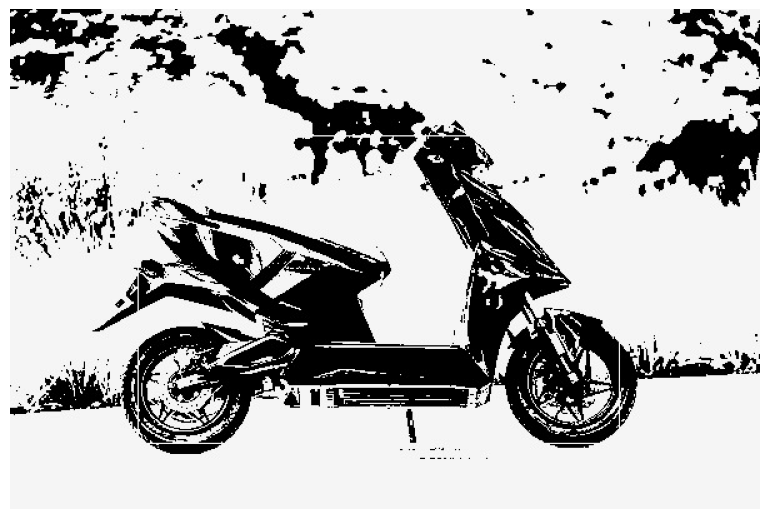

In [12]:
# now as we have the grayScaleImage now we can able to convert it into the black and white image 
# just keep this parameters in mind we will come back here after some time 
thresh,BWimageBike=cv2.threshold(gsBike,85,180,cv2.THRESH_BINARY)

# now save the image 
cv2.imwrite("outputs/BWbike.jpg",BWimageBike)
display("outputs/BWbike.jpg")

#### image to BW function

In [13]:
# now lets write function to convert a image into black and white
def toBWImage(img):
    thresh,BWimage=cv2.threshold(toGrayScale(img),120,200,cv2.THRESH_BINARY)
    return BWimage

In [14]:
# lets try this for car image 
BWcar=toBWImage(cv2.imread("car-14.png"))
cv2.imwrite("outputs/BWcar.png",BWcar)
# display("outputs/BWcar.png")

True

In [15]:
# now lets convert the text image 
th,bwImageText=cv2.threshold(gsPage01,200,230,cv2.THRESH_BINARY)
cv2.imwrite("outputs/BWtext.jpg",bwImageText)

True

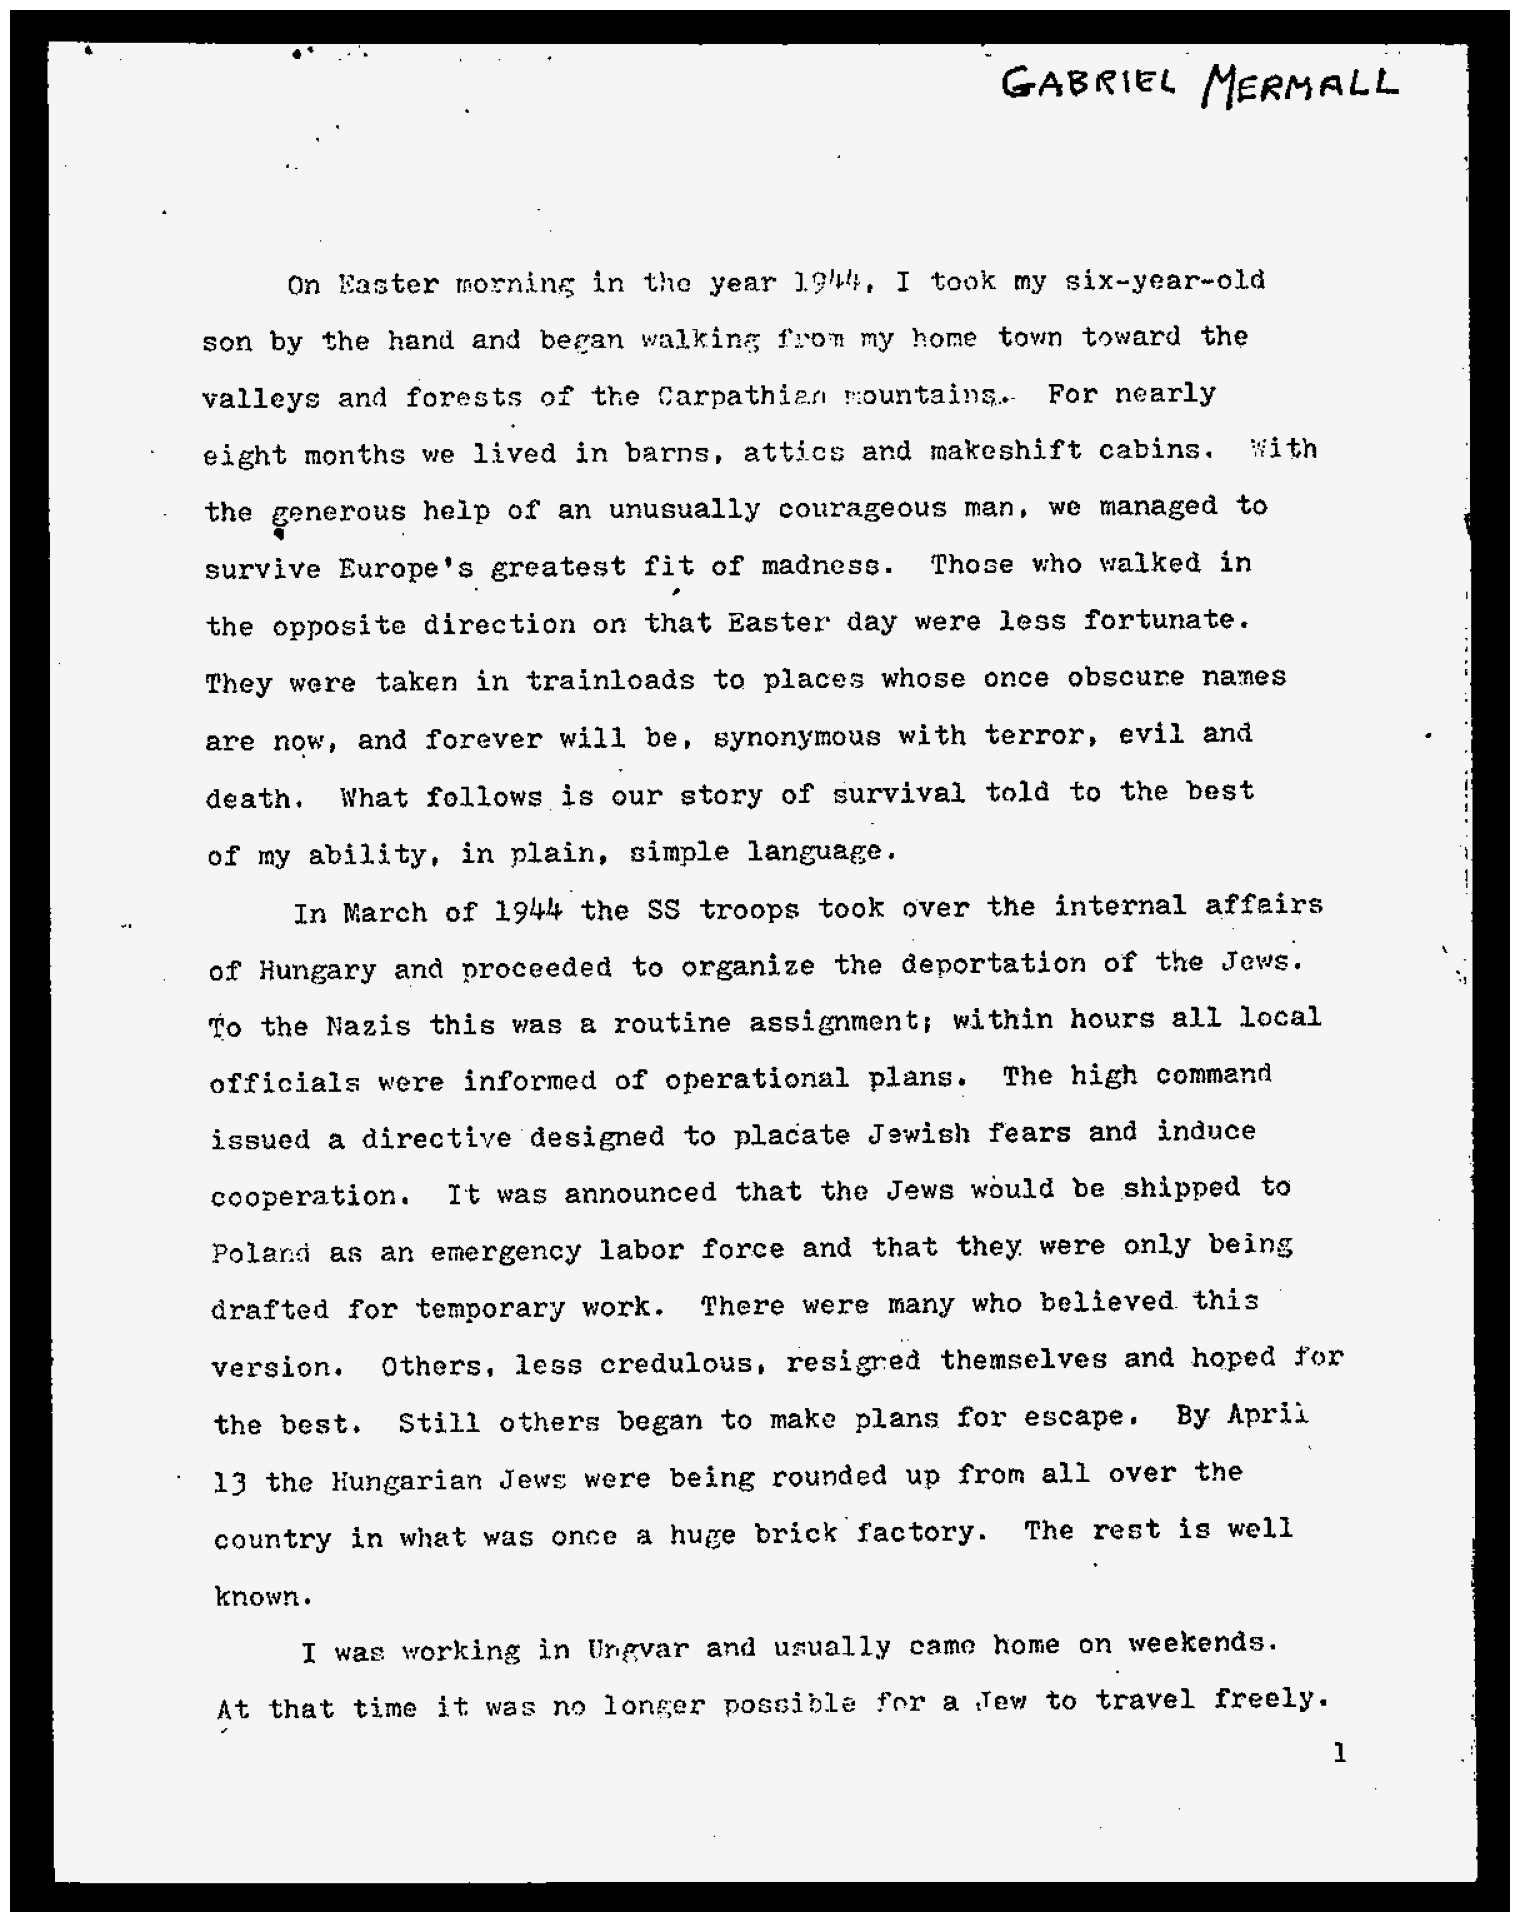

In [16]:
display("outputs/BWtext.jpg")

### Noise removal using OpenCV and Numpy

#### function for noise removal

In [17]:
def noiseRemoval(image):
    # first in noise removal we have to use erosion, dilation and morphology in order to 
    # remove the noise around character 

    # first create a kernal for dilation 
    kernal=np.ones((1,1),np.uint8)
    # do dilation
    image=cv2.dilate(image,kernel=kernal,iterations=1)
    
    # create another kernal for the erosion
    kernal=np.ones((1,1),np.uint8)
    # do erossion 
    image=cv2.erode(image,kernel=kernal,iterations=1)

    # now we are going to apply morphology and median blur
    image=cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel=kernal)
    image=cv2.medianBlur(image,3)
    
    # now return the output 
    return image

In [18]:
# lets try how noise removal works on the images
# we perform noise removal on black and white image 
NRText=noiseRemoval(bwImageText)

# save image 
cv2.imwrite("outputs/NRText.jpg",NRText)

True

In [19]:
# lets try same for the car and bike 
NRBike=noiseRemoval(BWimageBike)
cv2.imwrite("outputs/NRBike.jpg",BWimageBike)

# for car case noise noiseRemoval make things worse
BWcar=noiseRemoval(BWcar)
cv2.imwrite("outputs/NRcar.jpg",BWcar)

True

### Dilation and Erosion

#### function for making font thin

In [20]:
# first thing you should know that is in order to use the erode and
# dilate function you need a BW image and font in white color and background in black
def thin_font_using_erode(image):

    # first convert image in its inverse 
    image=cv2.bitwise_not(image)

    # preapare a kernal for the erode function
    kernal=np.ones((1,1),np.uint8)

    # now apply the kernal on the image 
    image=cv2.erode(image,kernal,iterations=1)

    # convert image back into the inverse 
    return cv2.bitwise_not(image)


In [21]:
erodedImage=thin_font_using_erode(bwImageText)
cv2.imwrite("outputs/erodedText.jpg",erodedImage)

True

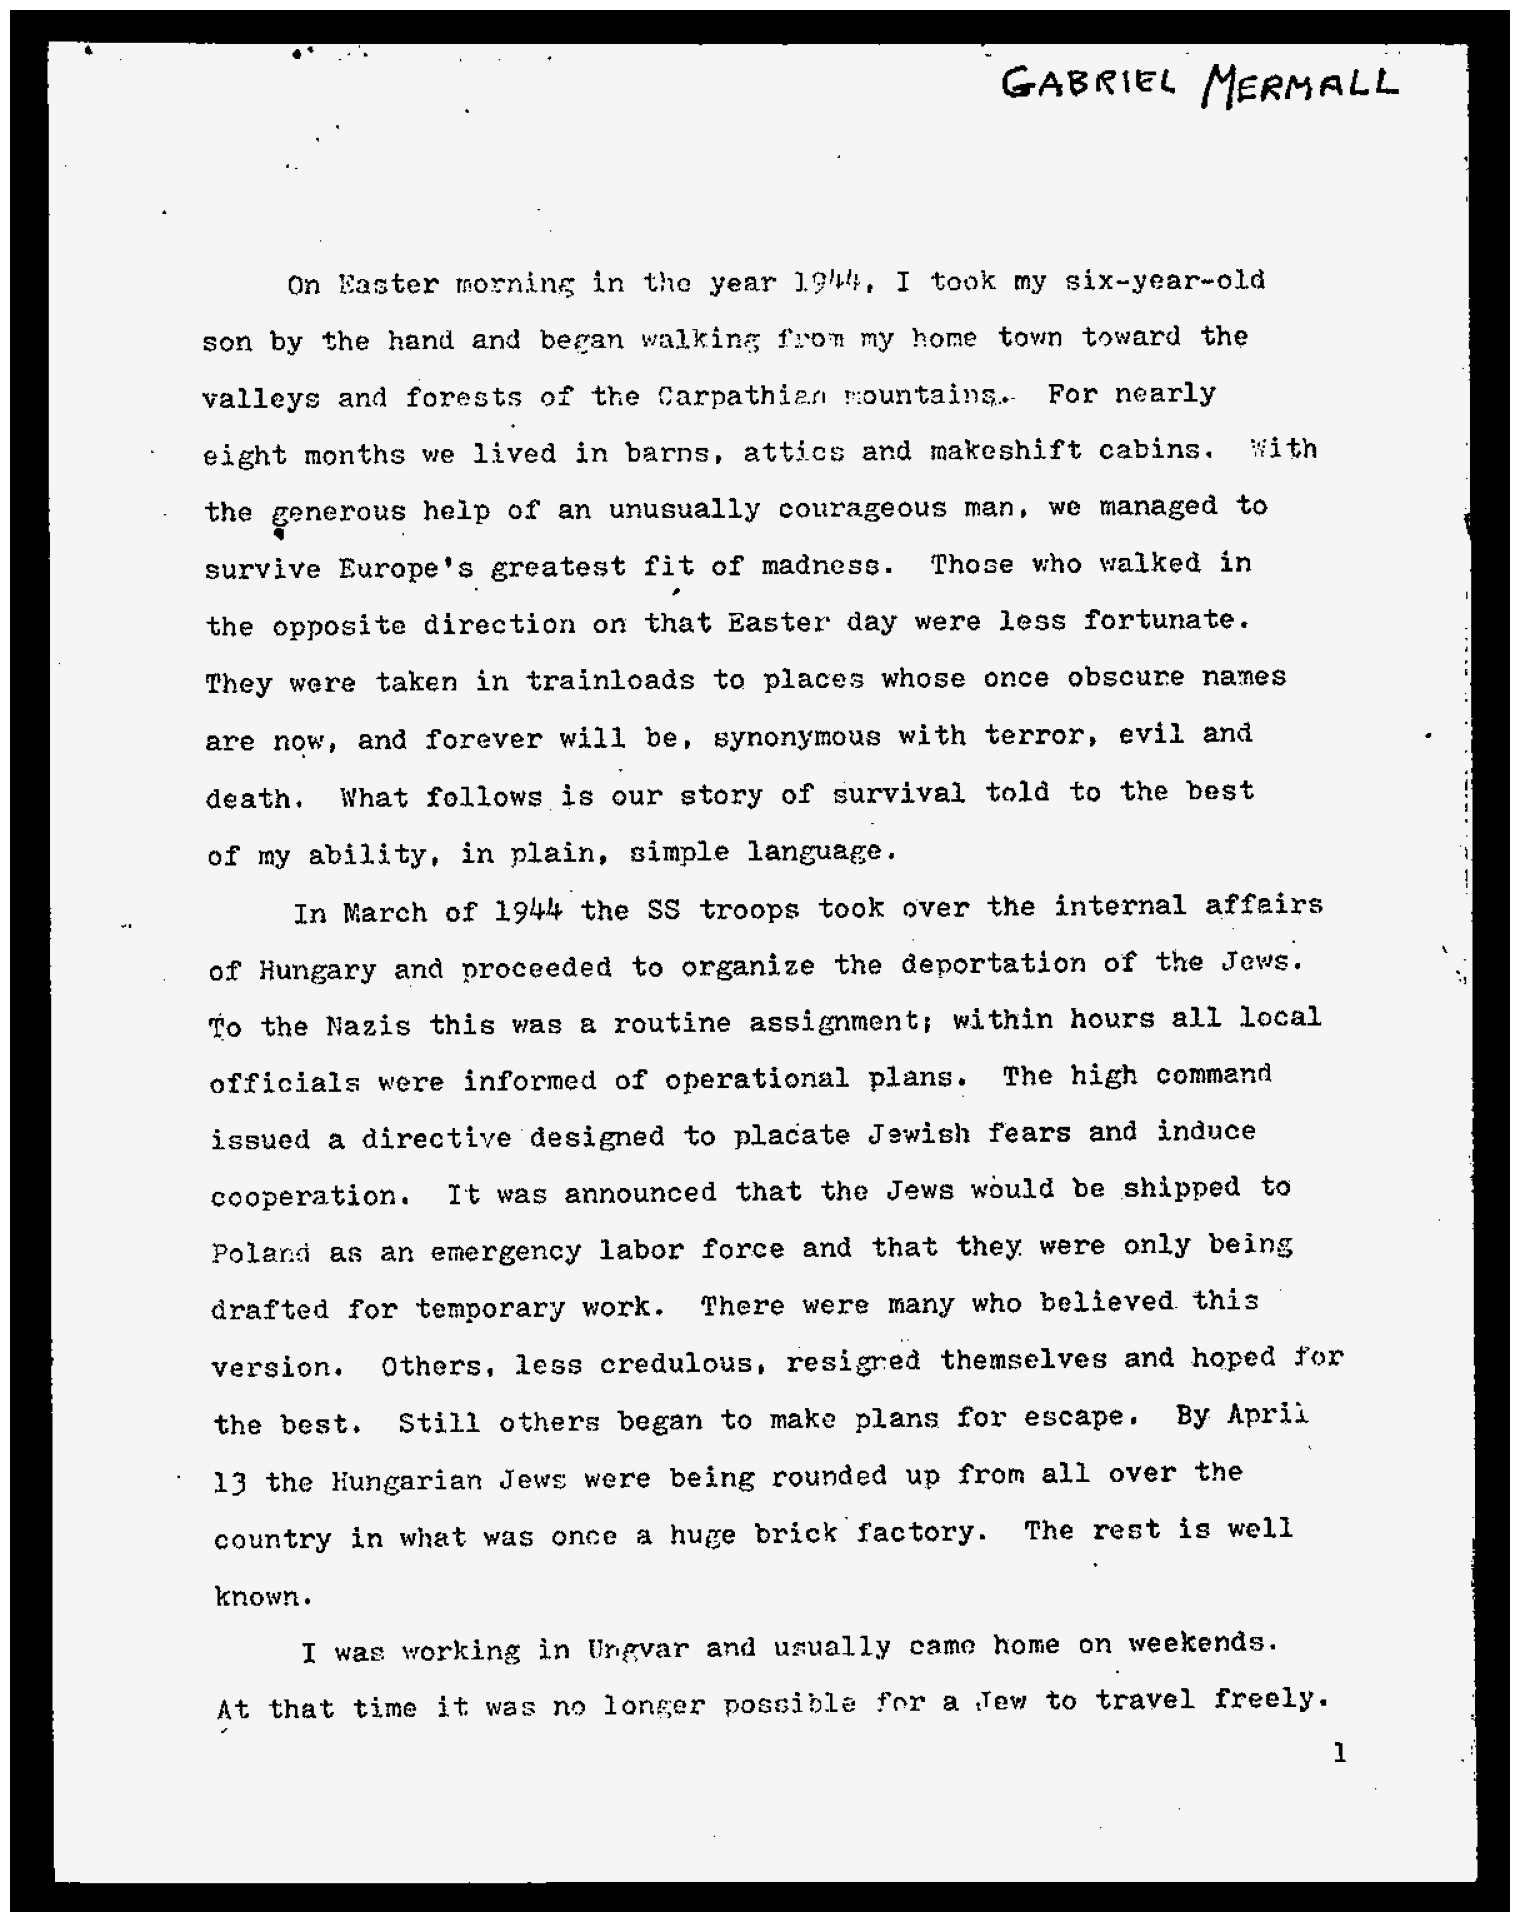

In [22]:
display("outputs/erodedText.jpg")

#### dilate function

In [23]:
# now lets try to make font thick using dilate 

def thick_font_using_dilate(image):

    # first convert image in its inverse 
    image=cv2.bitwise_not(image)

    # preapare a kernal for the erode function
    kernal=np.ones((2,2),np.uint8)

    # now apply the kernal on the image 
    image=cv2.dilate(image,kernal,iterations=1)

    # convert image back into the inverse 
    return cv2.bitwise_not(image)


In [24]:
dilatedImage=thick_font_using_dilate(bwImageText)
cv2.imwrite("outputs/dilatedText.jpg",dilatedImage)

True

In [25]:
# display("outputs/dilatedText.jpg")

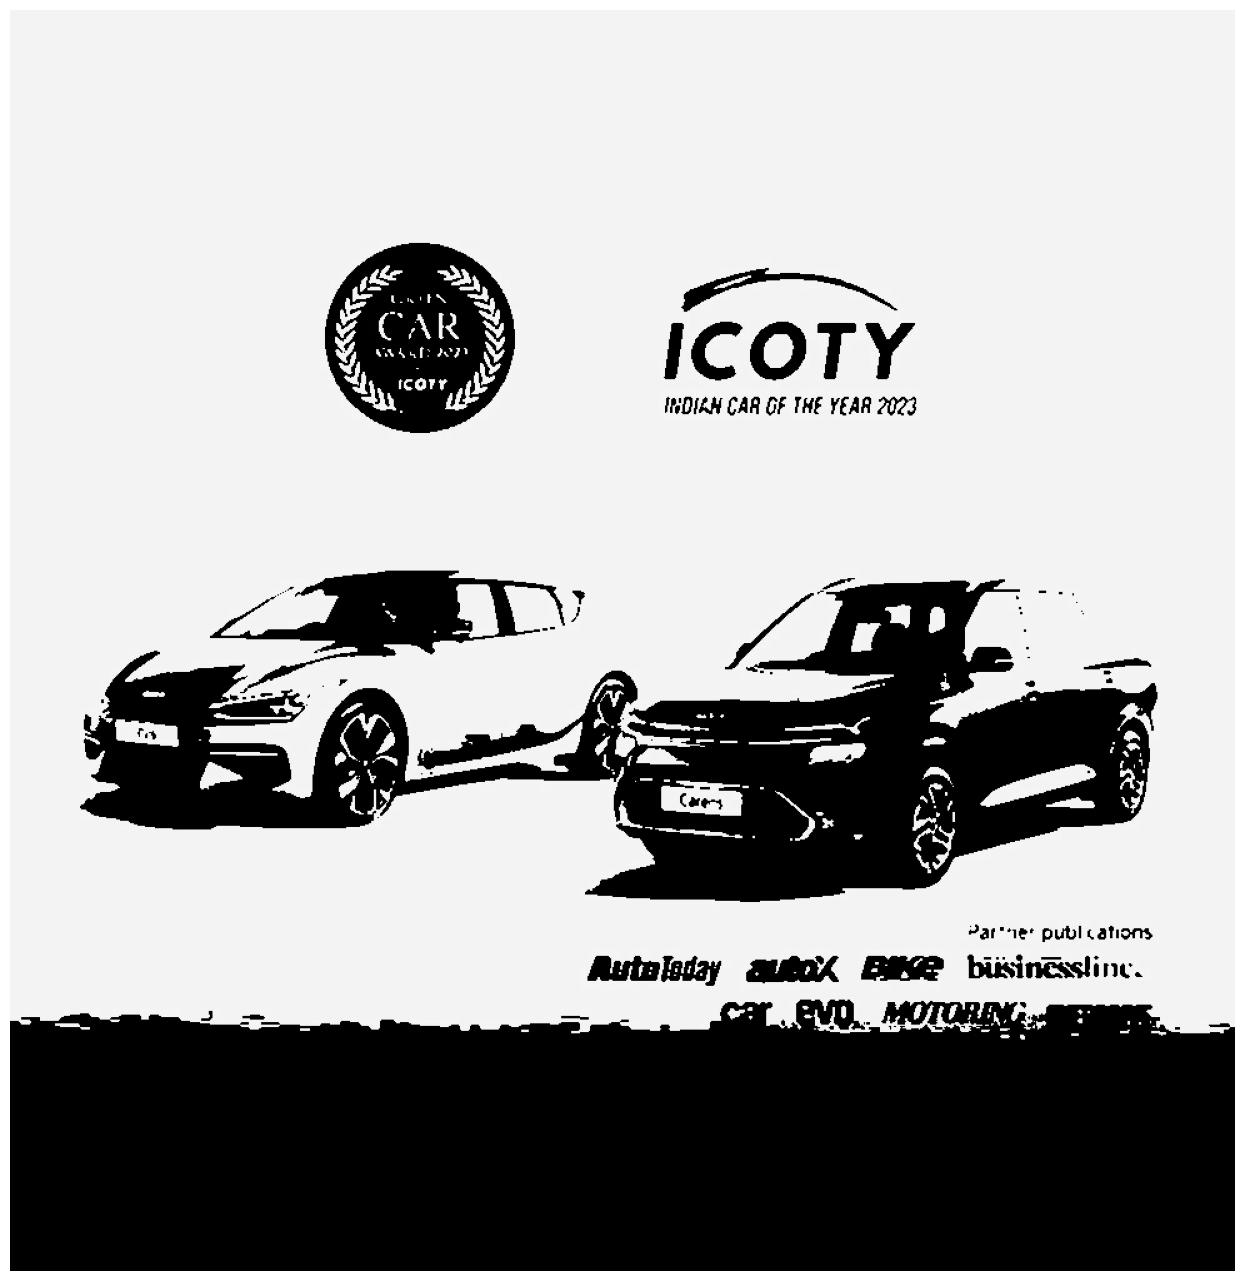

In [26]:
# lets try to make new images using thr dilate 
erodedImage=thin_font_using_erode(BWcar)
cv2.imwrite("outputs/erodedCar.jpg",erodedImage)
display("outputs/erodedCar.jpg")

### Rotating Image

In [27]:
from scipy.ndimage import interpolation as inter

def deskew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1, dtype=float)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2, dtype=float)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    corrected = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
            borderMode=cv2.BORDER_REPLICATE)

    return corrected

In [28]:
# try deskew function on the rotateImage 
im=cv2.imread("data/page_01_rotated.JPG")
im=deskew(im)
cv2.imwrite("outputs/rotationCorrected.jpg",im)

/tmp/user/1000/ipykernel_11625/233711975.py:5: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  data = inter.rotate(arr, angle, reshape=False, order=0)


True

### Eliminating the boundaries

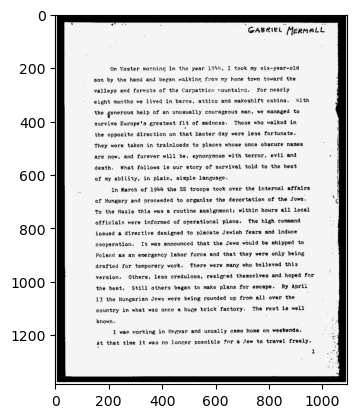

In [29]:
file=cv2.imread("data/download.png")
plt.imshow(file)

In [30]:
def borderElimination(img):
    contours,heiarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cntSorted=sorted(contours,key=lambda x: cv2.contourArea(x))
    cnt=cntSorted[-1]
    x,y,w,h=cv2.boundingRect(cnt)
    crop=img[y:y+h,x:x+w]
    return crop

In [31]:
m=borderElimination(dilatedImage)
cv2.imwrite("outputs/BorderRemovel.png",m)

True

### missing border

In [32]:
# color which you want to see on border
color=[155,155,155]

# this are the width 
top,bottom,left,right=[150]*4

# now use cv2 function to add border 
imageContainingBorder=cv2.copyMakeBorder(m,top,bottom,left,right,cv2.BORDER_CONSTANT,value=color)
cv2.imwrite("outputs/imageContainingBorder.png",imageContainingBorder)

# such like that we can able to addd the border to images 

True